In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
# load the dataset
df = pd.read_csv('GOOGL.csv', index_col='Date', parse_dates=['Date'])
df = df[['Close']]
df.head()

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055


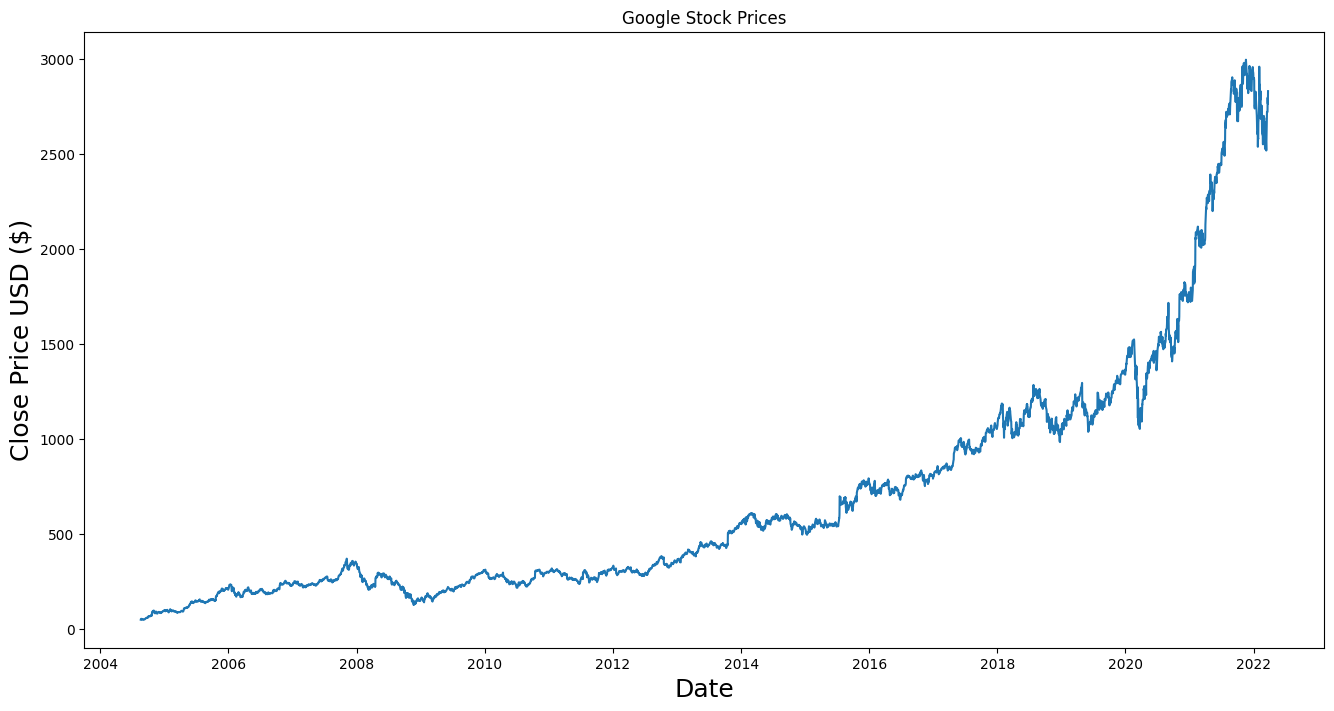

In [3]:
# visualize the dataset
plt.figure(figsize=(16,8))
plt.title('Google Stock Prices')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# preprocess the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [5]:
# split the data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
# define the RNN architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [7]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
109/109 [==============================] - 19s 88ms/step - loss: 0.0013
Epoch 2/25
109/109 [==============================] - 10s 88ms/step - loss: 3.1674e-04
Epoch 3/25
109/109 [==============================] - 10s 90ms/step - loss: 2.6425e-04
Epoch 4/25
109/109 [==============================] - 9s 80ms/step - loss: 2.6721e-04
Epoch 5/25
109/109 [==============================] - 10s 88ms/step - loss: 2.1530e-04
Epoch 6/25
109/109 [==============================] - 10s 88ms/step - loss: 1.9453e-04
Epoch 7/25
109/109 [==============================] - 9s 83ms/step - loss: 1.8601e-04
Epoch 8/25
109/109 [==============================] - 9s 84ms/step - loss: 1.8688e-04
Epoch 9/25
109/109 [==============================] - 12s 108ms/step - loss: 1.6548e-04
Epoch 10/25
109/109 [==============================] - 10s 89ms/step - loss: 1.5810e-04
Epoch 11/25
109/109 [==============================] - 10s 96ms/step - loss: 1.4916e-04
Epoch 12/25
109/109 [==========================

In [8]:
# test the model
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = df.iloc[training_data_len:, :]['Close'].values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 3s 24ms/step


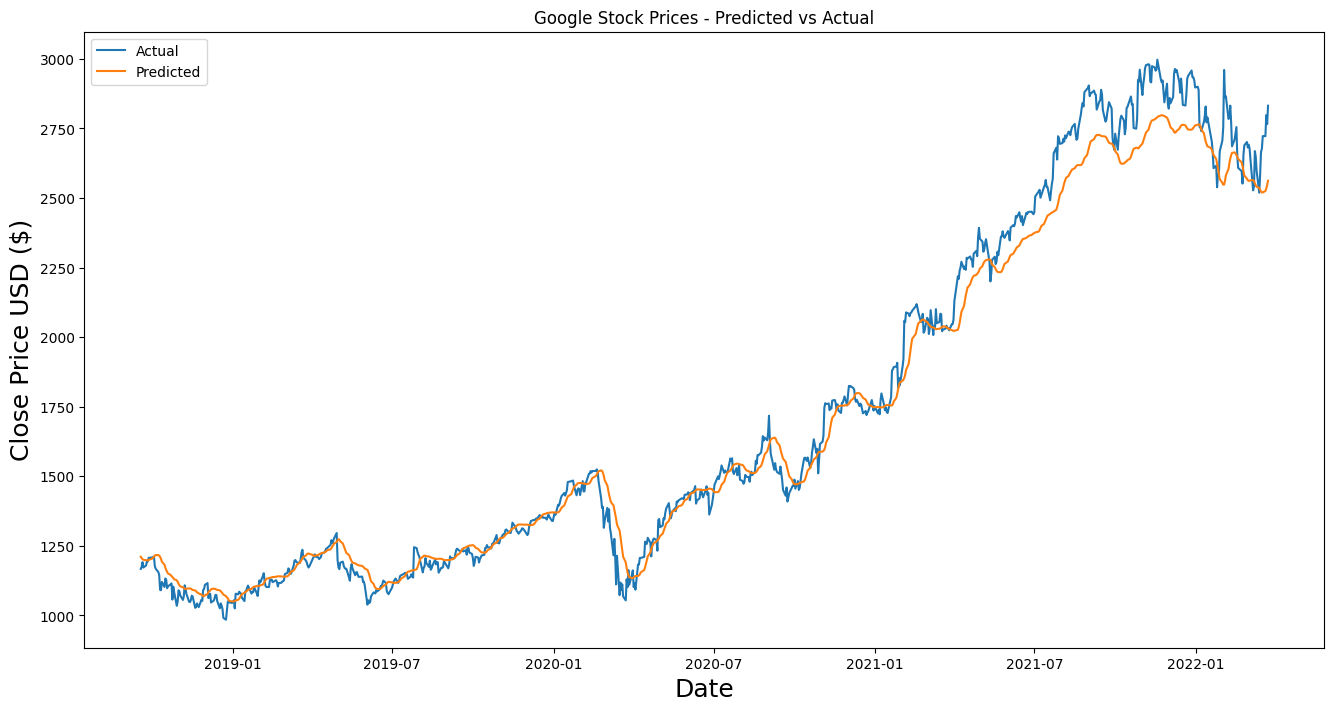

In [9]:
# visualize the predictions
plt.figure(figsize=(16,8))
plt.title('Google Stock Prices - Predicted vs Actual')
plt.plot(df.iloc[training_data_len:, :].index, y_test, label='Actual')
plt.plot(df.iloc[training_data_len:, :].index, predictions, label='Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()